In [1]:
import pandas as pd
import numpy as np
from lib.eda_funcs import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"..\data\heart_disease.csv", sep=";")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None


In [3]:
print(df.head(5))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


In [4]:
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.8750

In [5]:
print(percent_of_na(df))

ca          1.320132
thal        0.660066
age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
num         0.000000
dtype: float64


In [6]:
df = df.dropna(ignore_index=True)

In [7]:
# one-hot: sex, cp, restecg, ca, thal, fbs, exang, slope
# nothing: age, trestbps, chol, thalach, oldpeak

In [8]:
df = onehot(df, ["sex", "cp", "restecg", "ca", "thal", "fbs", "exang", "slope"])
df.head(5)

,age,trestbps,chol,thalach,oldpeak,num,sex_0,sex_1,cp_1,cp_2,...,thal_3.0,thal_6.0,thal_7.0,fbs_0,fbs_1,exang_0,exang_1,slope_1,slope_2,slope_3
0,63,145,233,150,2.3,0,0,1,1,0,...,0,1,0,0,1,1,0,0,0,1
1,67,160,286,108,1.5,2,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
2,67,120,229,129,2.6,1,0,1,0,0,...,0,0,1,1,0,0,1,0,1,0
3,37,130,250,187,3.5,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
4,41,130,204,172,1.4,0,1,0,0,1,...,1,0,0,1,0,1,0,1,0,0


In [9]:
print(df.duplicated().sum())

0


In [10]:
df.describe()
# подозрения на выбросы: trestbps, chol, thalach, oldpeak

,age,trestbps,chol,thalach,oldpeak,num,sex_0,sex_1,cp_1,cp_2,...,thal_3.0,thal_6.0,thal_7.0,fbs_0,fbs_1,exang_0,exang_1,slope_1,slope_2,slope_3
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,...,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556,0.946128,0.323232,0.676768,0.077441,0.164983,...,0.552189,0.060606,0.387205,0.855219,0.144781,0.673401,0.326599,0.468013,0.461279,0.070707
std,9.049736,17.762806,51.997583,22.941562,1.166123,1.234551,0.468500,0.468500,0.267741,0.371792,...,0.498108,0.239009,0.487933,0.352474,0.352474,0.469761,0.469761,0.499818,0.499340,0.256768
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,140.000000,276.000000,166.000000,1.600000,2.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


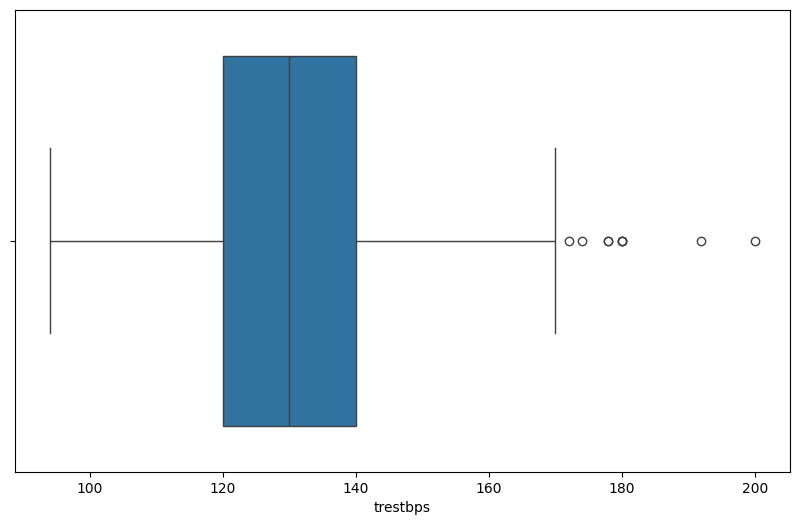

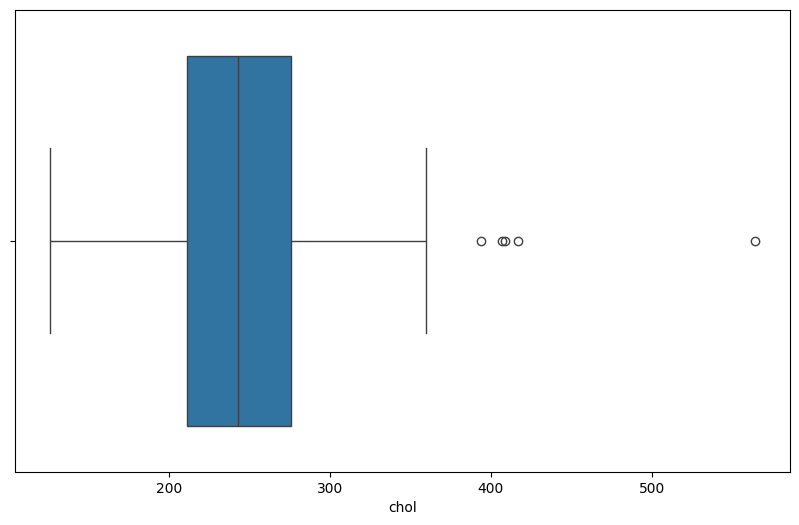

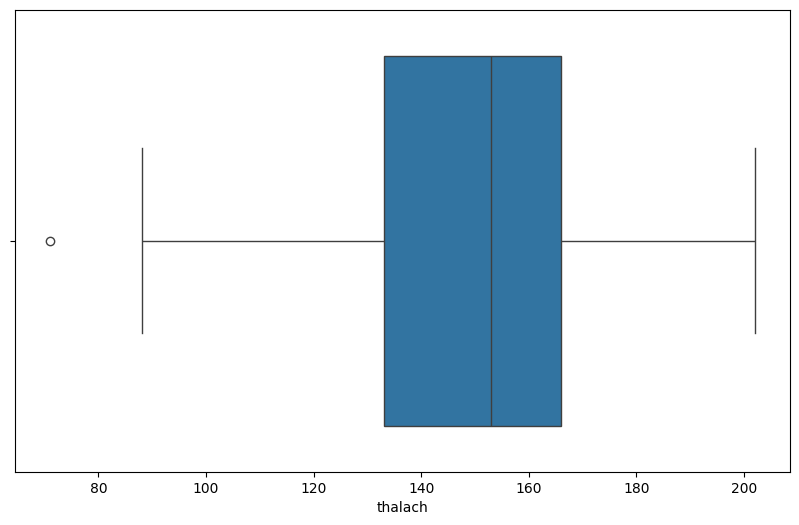

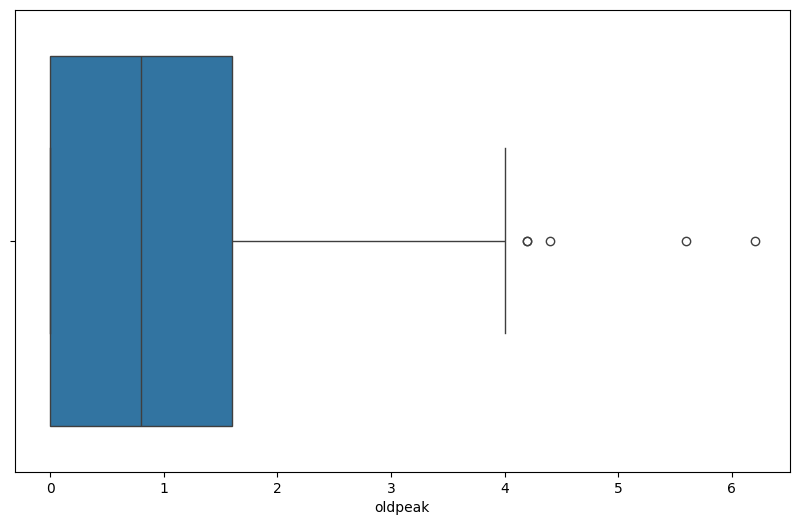

In [11]:
cols = ['trestbps', 'chol', 'thalach', 'oldpeak']
for col in cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, data=df)
    plt.show()

In [12]:
df = df[(df['trestbps'] <= 190)]
df = df[(df['chol'] < 500)]
df = df[(df['thalach'] >= 80)]
df = df[(df['oldpeak'] <= 5)]

[[<Axes: title={'center': 'age'}>]]
[[<Axes: title={'center': 'trestbps'}>]]
[[<Axes: title={'center': 'chol'}>]]
[[<Axes: title={'center': 'thalach'}>]]
[[<Axes: title={'center': 'oldpeak'}>]]
[[<Axes: title={'center': 'num'}>]]


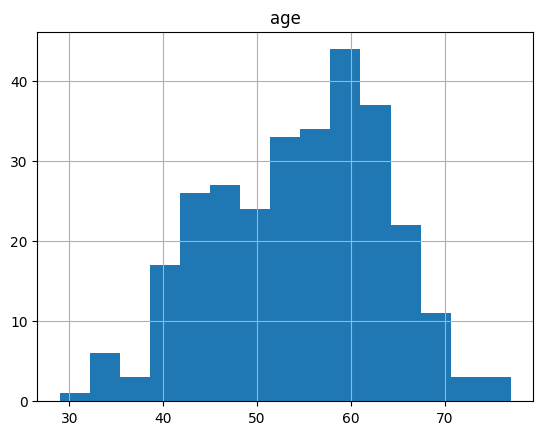

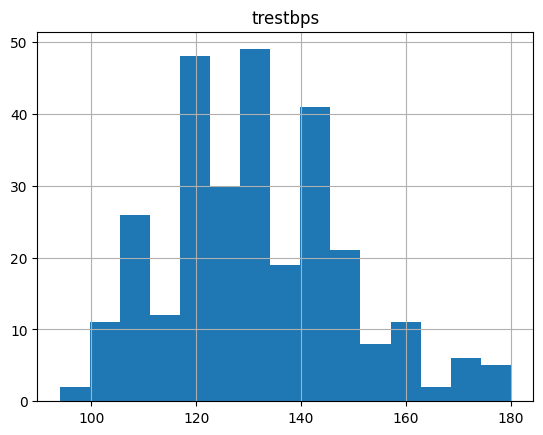

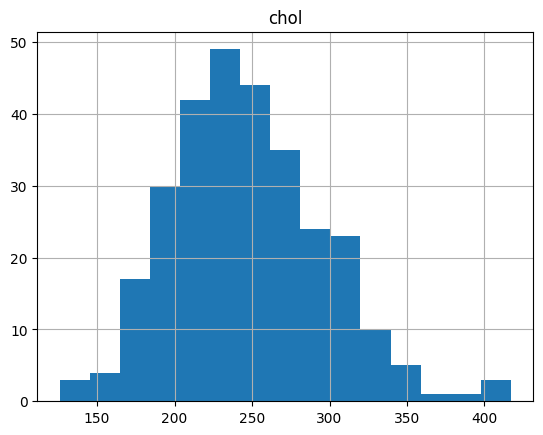

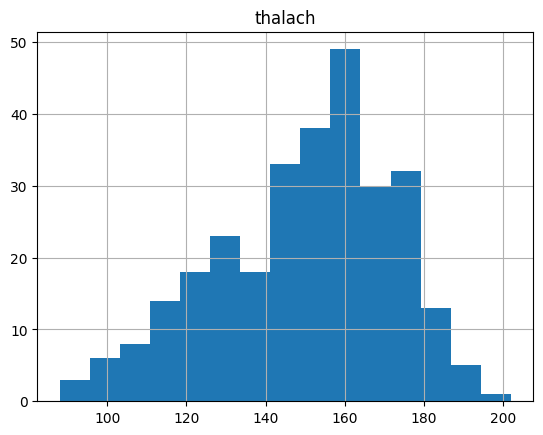

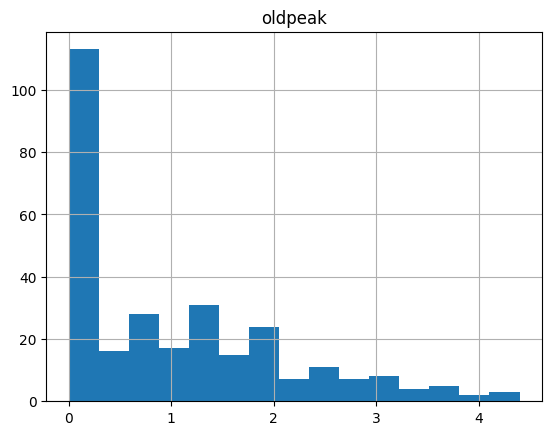

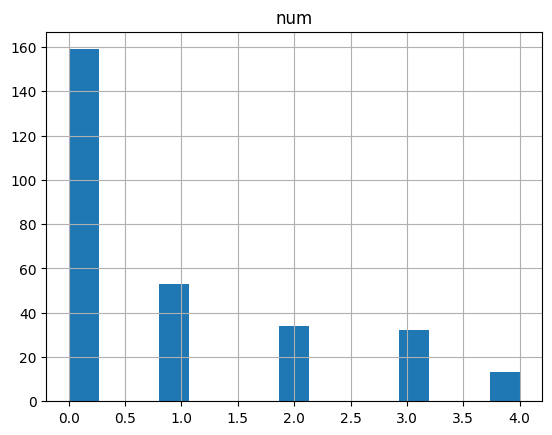

In [13]:
for col in ["age", "trestbps", "chol", "thalach", "oldpeak", "num"]:
    print(df.hist(col, bins=15))

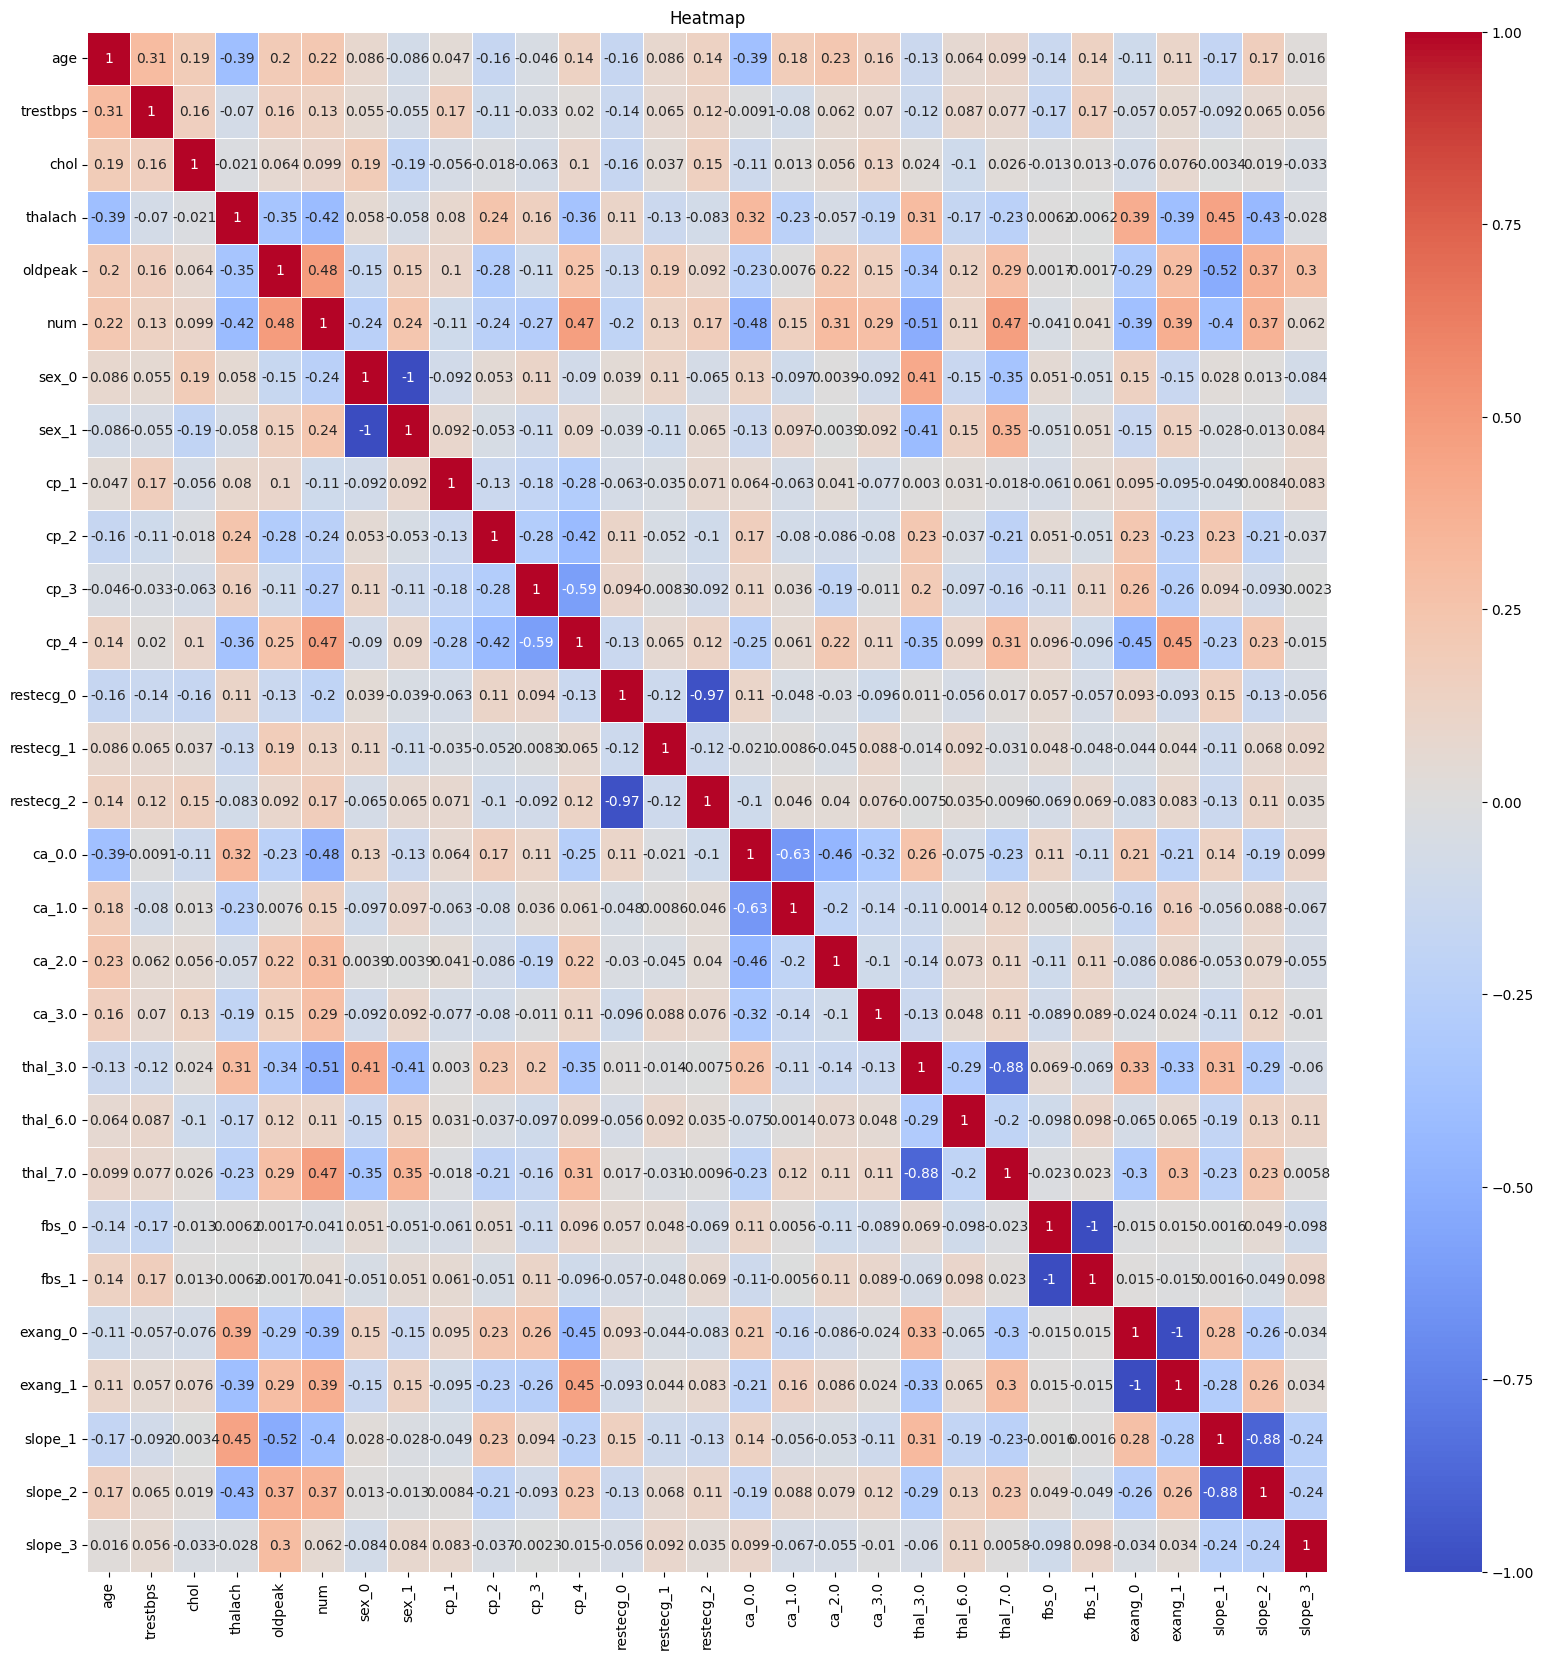

In [14]:
heatmap(df)

In [15]:
df.to_csv(r"..\data\processed_heart_disease.csv", sep=";", index=False, encoding='utf-8')